In [1]:
%load_ext autoreload
%autoreload 2

from dlp.dataset import Dataset
from utils import PostProcessor
from pathlib import Path
from PIL import Image, ImageDraw
from IPython.display import display
import numpy as np

In [2]:
# Load dataset
ds = Dataset()

home_path = str(Path.home())
ds.load(home_path + '/dlp-dataset/data/DJI_0012')

processor = PostProcessor(ds)

In [3]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=50)[-1]

img_frame = processor.vis.plot_frame(frame['frame_token'])

Feature image marked with intent label


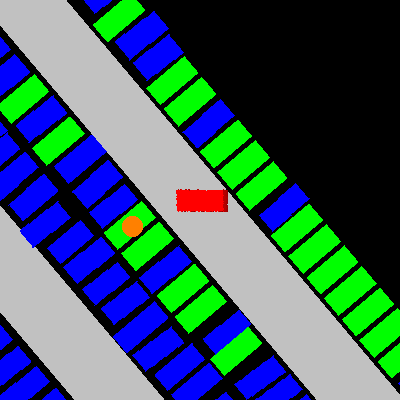

Label Heatmap:


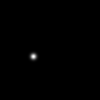

Offset: X = 0.000, Y = 0.500
Offset x:


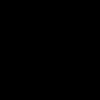

Offset y:


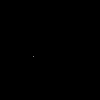

In [4]:
inst_token = frame['instances'][4]

feature, label = processor.gen_feature_label(inst_token, img_frame)

# ==== SVisualization ====
keypoint = processor.compute_keypoint(inst_token)

feature_with_label = feature.copy()
draw = ImageDraw.Draw(feature_with_label)

# Plot the intent label back to the feature img
draw.ellipse((keypoint[0]-10, keypoint[1]-10, keypoint[0]+10, keypoint[1]+10), fill=(255, 128, 0))

print("Feature image marked with intent label")
display(feature_with_label)

# Show the label heat map
print("Label Heatmap:")
label_heatmap = Image.fromarray(np.uint8(label[:, :, 0] * 255))
display(label_heatmap)

print("Offset: X = %.3f, Y = %.3f" % (np.amax(label[:, :, 1]), np.amax(label[:, :, 2])))

print("Offset x:")
offset_x_img = Image.fromarray(np.uint8(label[:, :, 1]*255))
display(offset_x_img)

print("Offset y:")
offset_y_img = Image.fromarray(np.uint8(label[:, :, 2]*255))
display(offset_y_img)
